# Notebook Description

This notebook is meant to be a fun project that tries to more accurately predict how many hits 5 all-star MLB players might have in a game. These calculations take in a number of factors from Home/Away, divisional rivals or not, the specific team, and the strength of the opposing pitcher. 

Last Data Update: July 27, 2023

Data Source: CSV via Baseball Reference (https://www.baseball-reference.com/players/gl.fcgi?id=ohtansh01&t=b&year=2023)

Date Range: 2023 MLB Season

Note: This Notebook is still a work in progress, see below for a To-Do List of upcoming analyzations and visualizations

Disclaimer: Due to data integration from CSV and the mapping of the "Date" of each game, the second game in a double header is NOT recordered or reflected in this notebook. 

# Instructions for Use

Step 1: Import necessary libraries, run the "Team Database" and "MLB Dictionary" cells. 

Step 2: If you have a question pretaining to database statistics, google it in the "MLB Dictionary"

Step 3: Run the "Please Select an MLB All-Star" by entering a player name (Tatis, Judge, Harper, Acuna, or Ohtani)

Step 4: Your chosen player's hitting statistics for the 2023 Season will be shown in a DataFrame

Step 5: Analytical Statistics & Visuals will be displayed further below

# Import Libraries

In [12]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
pd.set_option("display.max_columns", None)

# Team Database

In [13]:
AL_divisions = {
    "AL East": ["BAL", "BOS", "NYY", "TBR", "TOR"],
    "AL Central": ["CWS", "CLE", "DET", "KCR", "MIN"],
    "AL West": ["HOU", "LAA", "OAK", "SEA", "TEX"]}

NL_divisions = {
    "NL East": ["ATL", "MIA", "NYM", "PHI", "WSH"],
    "NL Central": ["CHC", "CIN", "MIL", "PIT", "STL"],
    "NL West": ["ARI", "COL", "LAD", "SDN", "SFN"]}

# MLB Dictionary

In [14]:
# Define the dictionary with the meanings of abbreviations
abbreviation_dict = {
    "Date": "A number in parentheses indicates which game of a doubleheader.",
    "AB": "At Bats",
    "R": "Runs Scored/Allowed",
    "H": "Hits/Hits Allowed",
    "2B": "Doubles Hit/Allowed",
    "3B": "Triples Hit/Allowed",
    "HR": "Home Runs Hit/Allowed",
    "RBI": "Runs Batted In",
    "SO": "Strikeouts",
    "BA": "Hits/At Bats",
    "OBP": "(H + BB + HBP)/(At Bats + BB + HBP + SF)",
    "SLG": "Total Bases/At Bats or (1B + 2*2B + 3*3B + 4*HR)/AB",
    "OPS": "On-Base + Slugging Percentages",
    "BOP": "Batting Order Position",
    "aLI": "Average Leverage Index",
    "Pos": "Positions played in game",
}

# User input prompt
user_input = input("Enter an abbreviation: ")

# Lookup the abbreviation in the dictionary
meaning = abbreviation_dict.get(user_input)

# Display the meaning if found, or an appropriate message if not found
if meaning:
    print(f"The abbreviation '{user_input}' stands for '{meaning}'.")
else:
    print(f"The abbreviation '{user_input}' was not found in the dictionary.")


Enter an abbreviation: aLI
The abbreviation 'aLI' stands for 'Average Leverage Index'.


# Please Select an MLB All-Star

In [19]:
# Dictionary mapping player names to team abbreviations
players = {"Tatis": "SDN","Judge": "NYY","Harper": "PHI","Acuna": "ATL","Ohtani": "LAA"}

# Get the selected player's name
print("Available players include: Acuna, Harper, Judge, Ohtani, and Tatis")
selected_player = input("Enter player name: ")

# Get the team abbreviation for the selected player
team_abbrv = players.get(selected_player)

if team_abbrv:
    # Read in CSV
    df = pd.read_csv(f"MLB-{selected_player}.csv")

    # Change the Date column to DateTime and make it the index
    df["Date"] = pd.to_datetime("2023 " + df["Date"], format="%Y %b %d")
    df.index = df["Date"].dt.strftime("%-m/%-d/%y")
    df.drop("Date", axis=1, inplace=True)

    # Change Result column to outcome
    df["W/L"] = df["Rslt"].str[0]

    # Change Result column to score
    df["Score"] = df["Rslt"].str[1:]

    # Drop the last row (it was an error)
    df = df.drop(df.index[-1])

    # Drop Unwanted Columns
    columns_to_drop = ["Unnamed: 0", "Rk", "Gcar", "Gtm", "Tm", "Rslt", "Inngs", "IBB", "HBP", "SH", "SF", "ROE",
                       "GDP", "SB", "CS", "WPA", "acLI", "cWPA", "RE24", "DFS(DK)", "DFS(FD)", "BB"]
    df = df.drop(columns_to_drop, axis=1)

    # Rename Columns
    df = df.rename(columns={"Unnamed: 6": "H/A"})
    df["H/A"] = df["H/A"].fillna("H")

    # Map opponents to their respective leagues
    league = ''
    for division, teams in AL_divisions.items():
        if team_abbrv in teams:
            league = "AL"
            break
    if not league:
        for division, teams in NL_divisions.items():
            if team_abbrv in teams:
                league = "NL"
                break
    df["League"] = league

    # Map opponents to their divisional rivals
    if league == "NL":
        for division, teams in NL_divisions.items():
            if team_abbrv in teams:
                division_rivals = teams
                df["Rival"] = df["Opp"].apply(lambda opp: "Yes" if opp in division_rivals else "No")
                break
    else:
        for division, teams in AL_divisions.items():
            if team_abbrv in teams:
                division_rivals = teams
                df["Rival"] = df["Opp"].apply(lambda opp: "Yes" if opp in division_rivals else "No")
                break

    # Reorder the Columns
    desired_order = ['H/A', 'Opp', 'League','Rival', 'W/L', "Score", 'PA', 'AB', 'R', 'H', '2B', '3B', 'HR', "RBI", 'SO', "aLI",'BA', 'OBP', 'SLG', 'OPS', 'BOP', 'Pos']
    df = df.reindex(columns=desired_order)

    display(df)

Available players include: Acuna, Harper, Judge, Ohtani, and Tatis
Enter player name: Ohtani


,H/A,Opp,League,Rival,W/L,Score,PA,AB,R,H,2B,3B,HR,RBI,SO,aLI,BA,OBP,SLG,OPS,BOP,Pos
Date,,,,,,,,,,,,,,,,,,,,,,
3/30/23,@,OAK,AL,Yes,L,1-2,4,3,0,1,0,0,0,0,2,1.04,0.333,0.500,0.333,0.833,3.0,DH P
4/1/23,@,OAK,AL,Yes,W,13-1,5,5,1,2,0,0,0,2,1,0.37,0.375,0.444,0.375,0.819,3.0,DH
4/2/23,@,OAK,AL,Yes,W,6-0,4,4,1,1,0,0,1,1,2,0.92,0.333,0.385,0.583,0.968,3.0,DH
4/3/23,@,SEA,AL,Yes,W,7-3,5,5,1,1,0,0,1,2,1,1.30,0.294,0.333,0.647,0.980,3.0,DH
4/4/23,@,SEA,AL,Yes,L,2-11,3,2,0,0,0,0,0,0,0,0.79,0.263,0.333,0.579,0.912,3.0,DH
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7/19/23,H,NYY,AL,No,W,7-3,5,1,2,0,0,0,0,0,1,0.30,0.306,0.397,0.678,1.075,2.0,DH
7/21/23,H,PIT,AL,No,W,8-5,4,1,2,0,0,0,0,0,1,0.64,0.305,0.400,0.676,1.076,2.0,DH P
7/22/23,H,PIT,AL,No,L,0-3,4,4,0,0,0,0,0,0,3,0.84,0.302,0.397,0.668,1.065,2.0,DH


# Home V Away Stats

In [20]:
#Home
home_df = df[df["H/A"] == "H"]

#Home Hits
h_hit = round(home_df["H"].mean(),2)

#Home Divisional Rival Hits
home_dr = home_df[home_df["Rival"] == "Yes"]
home_dr_hit = round(home_dr["H"].mean(), 2)

#Home Non-Rival Hits
home_non_dr = home_df[home_df["Rival"] == "No"]
home_non_dr_hit = round(home_non_dr["H"].mean(), 2)

#Away
away_df = df[df["H/A"] == "@"]

#Away Hits
a_hit = round(away_df["H"].mean(),2)

#Away Divisional Rival Hits
away_dr = away_df[away_df["Rival"] == "Yes"]
away_dr_hit = round(away_dr["H"].mean(), 2)

#Away Non-Rival Hits
away_non_dr = away_df[away_df["Rival"] == "No"]
away_non_dr_hit = round(away_non_dr["H"].mean(), 2)

#DataFrame
data = {selected_player: [h_hit,home_dr_hit,home_non_dr_hit,a_hit,away_dr_hit,away_non_dr_hit]}
headers = ["Home Hits","Home + Rival Hits","Home + NON Rival Hits","Away Hits","Away + Rival Hits","Away + NON Rival Hits"]

# Create the DataFrame
data_df = pd.DataFrame(data, index=headers).transpose()
display(data_df)

,Home Hits,Home + Rival Hits,Home + NON Rival Hits,Away Hits,Away + Rival Hits,Away + NON Rival Hits
Ohtani,1.06,1.38,0.91,1.21,1.36,1.15


# Specific Team & Divisional Statistics

Please enter the 3-letter abbreviation (all caps) of the opponent: LAD

The selected player averages 1.0 hits per game against LAD


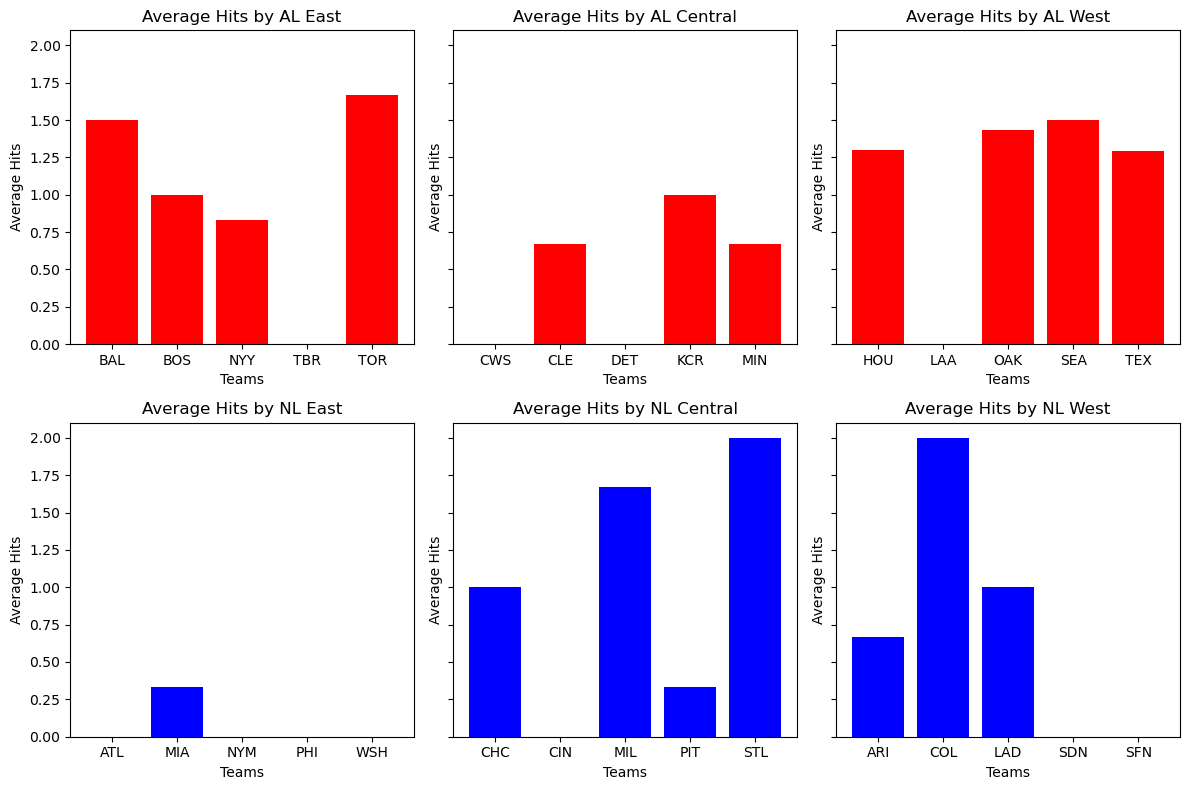

In [22]:
# Specific Team Data Table
opp_list = ['BAL', 'BOS', 'NYY', 'TBR', 'TOR','CWS', 'CLE', 'DET', 'KCR', 'MIN','HOU', 'LAA', 'OAK', 'SEA', 'TEX','ATL', 'MIA', 'NYM', 'PHI', 'WSH','CHC', 'CIN', 'MIL', 'PIT', 'STL','ARI', 'COL', 'LAD', 'SDN', 'SFN']
specific = []

# Iterate over every team to get there average hits
for team in opp_list:
    spec_team = df[df["Opp"] == team]
    specifc_team_hit = round(spec_team["H"].mean(),2)
    specific.append(specifc_team_hit)
    
    
# Transform the list to a dataframe to show average hits vs each team
headers = ["Average Hits by Specific Team"]
specific_df = pd.DataFrame(specific, index = opp_list, columns=headers)
specific_df = specific_df.fillna(0)

# Asl user for a Specific Team Input 
opp = input("Please enter the 3-letter abbreviation (all caps) of the opponent: ")
value = specific_df.at[opp,"Average Hits by Specific Team"]

print("")
print("The selected player averages", value, "hits per game against", opp)

#Divisional Bar Chart Visualization
fig, axs = plt.subplots(2, 3, figsize=(12, 8), sharey=True)
division_indices = [
    (0, 5),    # AL East indices
    (5, 10),   # AL Central indices
    (10, 15),  # AL West indices
    (15, 20),  # NL East indices
    (20, 25),  # NL Central indices
    (25, 30)   # NL West indices
]
division_titles = ['AL East', 'AL Central', 'AL West', 'NL East', 'NL Central', 'NL West']
colors = ["red", "red", "red", "blue", "blue", "blue"]

# Create subplots for all 6 divisions
for i, ax in enumerate(axs.flatten()):
    teams = opp_list[division_indices[i][0] : division_indices[i][1]] 
    if i<3:
        colors = "red"
    else:
        colors="blue"
    ax.bar(teams, specific_df.loc[teams, "Average Hits by Specific Team"], color=colors)
    ax.set_title(f"Average Hits by {division_titles[i]}")
    ax.set_xlabel("Teams")
    ax.set_ylabel("Average Hits")

# Display 6 subplots for AL and NL Divisions with average hit for each team
plt.tight_layout()
plt.show()

# Percentage Breakdown of Hits Across Different DataFrames
- Statistic Percentage for that specific number of hits within that specific dataframe. For example "25.0" in home_df for 2 hits ... means that across all home games, 25% of the time they have a 2-hit game.

In [23]:
#Print title
print("                            Percentage Breakdown of Hits Across all DataFrames")
# List of DataFrames
df_list = [df, home_df, home_dr, home_non_dr, away_df, away_dr, away_non_dr]
# List of DataFrame names
df_names = ["All Games", "Home Games", "Home + Division Rivals", "Home Non Division Rivals", "Away Games", "Away + Division Rivals", "Away Non Division Rivals"]

# Empty DataFrame to store the statistics and percentages
stats_df = pd.DataFrame()

# Iterate over the list of DataFrames
for dataframe, name in zip(df_list, df_names):
    # Calculate value counts for "H" column
    value_counts = dataframe["H"].value_counts()
    # Create a temporary DataFrame with value counts
    temporary_df = pd.DataFrame({name: value_counts.values}, index=value_counts.index)

    # Concatenate the temporary DataFrame horizontally to the overall statistics DataFrame
    stats_df = pd.concat([stats_df, temporary_df], axis=1)
    stats_df = stats_df.fillna(0)
    stats_df = stats_df.sort_index()
    stats_df = stats_df.astype(float)

    # Calculate the sum of the column
    column_sum = stats_df[name].sum()
    # Calculate the percentages for each value in the column
    percentages = (stats_df[name] / column_sum) * 100

    # Update the column in the stats_df with the percentages
    stats_df[name] = round(percentages, 1)

display(stats_df)

                            Percentage Breakdown of Hits Across all DataFrames


,All Games,Home Games,Home + Division Rivals,Home Non Division Rivals,Away Games,Away + Division Rivals,Away Non Division Rivals
0,29.3,31.4,25.0,34.3,27.1,14.3,32.4
1,42.4,43.1,31.2,48.6,41.7,50.0,38.2
2,16.2,13.7,25.0,8.6,18.8,28.6,14.7
3,10.1,11.8,18.8,8.6,8.3,0.0,11.8
4,2.0,0.0,0.0,0.0,4.2,7.1,2.9


# Hit/Home Run & Average Leverage Index Correlation

/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/seaborn/categorical.py:1296: UserWarning: 9.5% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword 

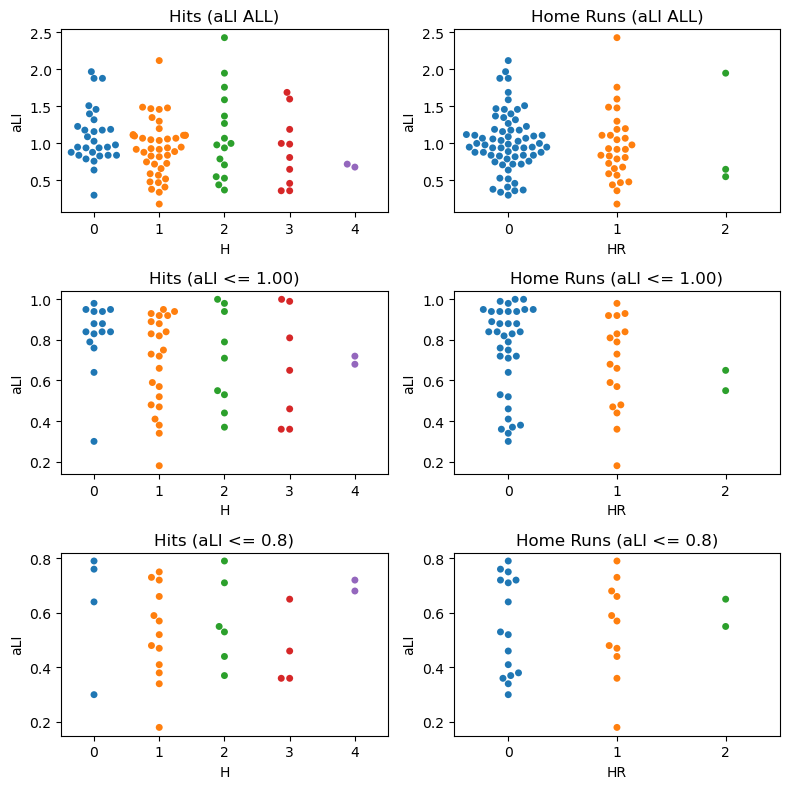

The selected player has a 31.2 % probability to hit a home run in any game.
The selected player has a 33.3 % probability to hit a home run when the opposing ALI of the Pitcher is less than 1.
The selected player has a 40.7 % probability to hit a home run when the opposing ALI of the Pitcher is less than 0.8.

The selected player is  1.3  times more likely to hit a home run when the ALI is below 0.8 opposed to any game.


In [24]:
#Create a Dataframe that filteres Average Leverage Index BELOW 1.00
aLI_filtered = df[df["aLI"] <= 1.00]
#Below 0.8
aLI_more_filtered = df[df["aLI"] <= 0.8]


# Create subplots
fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(8, 8))

#Regular DataFrame - First Row
sns.swarmplot(df["H"], df["aLI"], ax=axes[0, 0])
axes[0, 0].set_title('Hits (aLI ALL)')
sns.swarmplot(df["HR"], df["aLI"], ax=axes[0, 1])
axes[0, 1].set_title('Home Runs (aLI ALL)')

#ALI Below 1 - Second Row
sns.swarmplot(aLI_filtered["H"], aLI_filtered["aLI"], ax=axes[1, 0])
axes[1, 0].set_title('Hits (aLI <= 1.00)')
sns.swarmplot(aLI_filtered["HR"], aLI_filtered["aLI"], ax=axes[1, 1])
axes[1, 1].set_title('Home Runs (aLI <= 1.00)')

#ALI Below 0.8 - Third Row
sns.swarmplot(aLI_more_filtered["H"], aLI_more_filtered["aLI"], ax=axes[2, 0])
axes[2, 0].set_title('Hits (aLI <= 0.8)')
sns.swarmplot(aLI_more_filtered["HR"], aLI_more_filtered["aLI"], ax=axes[2, 1])
axes[2, 1].set_title('Home Runs (aLI <= 0.8)')

# Display
plt.tight_layout()
plt.show()

#Homerun probability for all games
all_games = df["HR"].value_counts()
all_hr_prob = round(all_games[1]/(all_games[1]+all_games[0])*100,1)
print("The selected player has a", all_hr_prob, "% probability to hit a home run in any game.")

#Homerun probabilty when Average Leverage Index is LESS than 1.0
less_than_1 = aLI_filtered["HR"].value_counts()
filt_hr_prob = round(less_than_1[1]/(less_than_1[1]+less_than_1[0])*100,1)
print("The selected player has a", filt_hr_prob, "% probability to hit a home run when the opposing ALI of the Pitcher is less than 1.")

#Homerun probabilty when Average Leverage Index is LESS than 0.8
less_than_decimal = aLI_more_filtered["HR"].value_counts()
more_filt_hr_prob = round(less_than_decimal[1]/(less_than_decimal[1]+less_than_decimal[0])*100,1)
print("The selected player has a", more_filt_hr_prob, "% probability to hit a home run when the opposing ALI of the Pitcher is less than 0.8.")

print("")
print("The selected player is ", round(more_filt_hr_prob/all_hr_prob,2), " times more likely to hit a home run when the ALI is below 0.8 opposed to any game.")

# Things to work on in the future


1 - 10 game and 20 game slump lines with OBP and BA

2 - Hit probability correlated with last 3 game strike outs

3 - Hit probability correlated with last 3 game W/L

4 - Create a "hit-probability number" based on a variety of factors and percentages